<div style="border:solid green 2px; padding: 20px">
<b>Hi Rakibul Islam Sitab! My name is Paul and I am here to improve your project together</b>
    


You can find my comments in <font color='green'>green</font>, <font color='orange'>orange</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment: </b> if I can give some recommendations
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment:</b> if the block requires some corrections. Work can't be accepted with red comments.
</div>

Please, do not move or delete my comments - it helps us move faster =)
    
To make a dialog let's use this style for your remarks:

<div class="alert alert-info"> <b>Student's comment:</b> Just like this</div>

To make a similar block - double click on the previous row, copy and edit it in places you are changing ;) 

### <font color='red'>General feedback</font>
Thank you for sending your project. You've done a really good job on it and it was interesting to check. The code style is pretty good for the 3rd sprint! Glad to see that notebook is well-structured and such a detailed overall conclusion. I've left some comments in colored blocks that could help you to improve your analytical project and coding. We are almost there, only a couple of minor issues are here, but I believe, you can easily handle them ;) waiting for your fixes and come back soon =)

<div style="border:solid black 2px; padding: 20px">
    
# Analyze clients' behavior and determine which prepaid plan brings in more revenue.

**Project description:**
    
The Megaline company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
I'm going to carry out a preliminary analysis of the plans based on a relatively small client selection. I'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018.
  
**Description of the plans:**
    
Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.
    
**Surf**
    
1. Monthly charge: $20
1. 500 monthly minutes, 50 texts, and 15 GB of data 

After exceeding the package limits: 
1. minute: 3 cents
1. text message: 3 cents
1. GB of data: $10
    
**Ultimate**
    
1. Monthly charge: $70 
2. 3000 monthly minutes, 1000 text messages, and 30 GB of data 

After exceeding the package limits:
1. minute: 1 cent
1. text message: 1 cent
1. GB of data: $7
    
**Project purpose:**  
    
Analyze clients' behavior and determine which prepaid plan brings in more revenue.

**Project Task:**
    
I'll will describe the customers' behavior and find the minutes, texts, and volume of data the users of each plan require per month.I'll will also calculate the mean, dispersion, and standard deviation.The distributions will also be described with histograms. 
    
**Hypotheses Testing:**
    
1. The average revenue from users of Ultimate and Surf calling plans differs.
1. The average revenue from users in NY-NJ area is different from that of the users from other regions.



    

<div class="alert alert-info"> <b>Student's comment:</b> Project task and purpose have been updated</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment:</b>

Here, before we start, it'll be good to describe our task and purpose of the project - it gives a direction of our exploration and understanding about what result should we come to


</div>


<div style="border:solid black 2px; padding: 10px">
    
## Step 1. Open the data file and study the general information.

<div class="alert alert-block alert-success">
<b>Reviewer's comment:</b> It's a good practice to make all imports in 1st cell, well done
</div>

In [1]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from scipy import stats as st

<div class="alert alert-block alert-danger">
<b>Reviewer's comment:</b>

Here was a tiny issue with missingno - the platforms enviroment doesn't contain this package and it wasn't installed

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment:</b>

And used. So, to be able to chech the project I've commented this row.
Next time, if you like to use something extra - just make sure it is installed (`pip install missingno`)

</div>


In [3]:
calls_df = pd.read_csv('megaline_calls.csv')
internet_df = pd.read_csv('megaline_internet.csv')
messages_df = pd.read_csv('megaline_messages.csv')
plans_df = pd.read_csv('megaline_plans.csv')
users_df = pd.read_csv('megaline_users.csv')

# rouding for durarion and mb_used column
calls_df['duration_roundUP']=calls_df['duration'].apply(np.ceil)
internet_df['GB_used']=internet_df['mb_used']  / 1024
internet_df['GB_used_rounded']=internet_df['GB_used'].apply(np.ceil)
calls_df=calls_df.drop('duration',axis=1)

#deleting mb_used and GB_used column

internet_df=internet_df.drop('mb_used',axis=1)
internet_df=internet_df.drop('GB_used',axis=1)


display(calls_df.head())
display(internet_df.head())
display(messages_df.head())
display(plans_df.head())
display(users_df.head())

display(calls_df.info())
display(internet_df.info())
display(messages_df.info())
display(plans_df.info())
display(users_df.info())



,id,user_id,call_date,duration_roundUP
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


,id,user_id,session_date,GB_used_rounded
0,1000_13,1000,2018-12-29,1.0
1,1000_204,1000,2018-12-31,0.0
2,1000_379,1000,2018-12-28,1.0
3,1000_413,1000,2018-12-26,1.0
4,1000_442,1000,2018-12-27,1.0


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                137735 non-null  object 
 1   user_id           137735 non-null  int64  
 2   call_date         137735 non-null  object 
 3   duration_roundUP  137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               104825 non-null  object 
 1   user_id          104825 non-null  int64  
 2   session_date     104825 non-null  object 
 3   GB_used_rounded  104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

<div class="alert alert-block alert-warning">
<b>Reviewer's comment:</b>

Please, pay an attention for the project datasources - all of them Now contain "/datasets/" prefix to make the code alive =)

</div>


<div class="alert alert-block alert-success">
<b>Reviewer's comment:</b>

Nice to see how easily you've made roundings

</div>


<div style="border:solid black 2px; padding: 10px">

* New column duration_roundUP and GB_used_rounded have been added to the calls_df dataframe and internet_df dataframe using np.ceil method from duration and mb_used column respectively.mb_used and GB_used column have been deleted using column drop method.


<div style="border:solid black 2px; padding: 10px">
    
## Step 2. Data preprocessing

In [4]:
# date is formated for the respective date related column

calls_df["call_date"] = pd.to_datetime(calls_df["call_date"], format='%Y-%m-%d')
internet_df["session_date"] = pd.to_datetime(internet_df["session_date"], format='%Y-%m-%d')
messages_df["message_date"] = pd.to_datetime(messages_df["message_date"], format='%Y-%m-%d')


# new table is added to respective dataframe for month according to the date related column

calls_df["month"] = pd.DatetimeIndex(calls_df["call_date"]).month
internet_df["month"] = pd.DatetimeIndex(internet_df["session_date"]).month
messages_df["month"] = pd.DatetimeIndex(messages_df["message_date"]).month
messages_df["messages_sent"] = 1

# dataframes are grouped using pivot table

pivot_calls = calls_df.pivot_table(index=['user_id','month'], values='duration_roundUP',aggfunc=['sum','count']).reset_index()
pivot_internet = internet_df.pivot_table(index=['user_id','month'], values='GB_used_rounded',aggfunc=['sum']).reset_index()
pivot_messages = messages_df.pivot_table(index=['user_id','month'],values='messages_sent',aggfunc=['count']).reset_index()
pivot_users = users_df.pivot_table(index=['user_id','plan','city']).reset_index()

#coulmn name is changed here

pivot_calls.columns=['user_id','month','duration_roundUP','no_of_call']
pivot_internet.columns=['user_id','month','GB_used_rounded']
pivot_messages.columns=['user_id','month','messages_sent']

display(pivot_calls.head())
display(pivot_internet.head())
display(pivot_messages.head())

#pivot_calls,pivot_internet and pivot_messages are merged here on 'user_id' and 'month' column.
data_frames = [pivot_calls, pivot_internet, pivot_messages]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id','month'],
                                            how='outer'), data_frames).fillna(0)
display(df_merged.head())

#df_merged are merged with pivot_users table on 'user_id' column
data_frames_2 = [df_merged,pivot_users]
df_merged_2 = reduce(lambda  left,right: pd.merge(left,right,on=['user_id'],
                                           how='outer'), data_frames_2).fillna(0)
display(df_merged_2.head())
display(len(df_merged_2))
display(df_merged_2.isnull().sum())
print('Dataframe_lenth:',len(df_merged_2))
print('Dataframe length which have zero min call duration:',len(df_merged_2.query('duration_roundUP==0 ')))

,user_id,month,duration_roundUP,no_of_call
0,1000,12,124.0,16
1,1001,8,182.0,27
2,1001,9,315.0,49
3,1001,10,393.0,65
4,1001,11,426.0,64


,user_id,month,GB_used_rounded
0,1000,12,4.0
1,1001,8,21.0
2,1001,9,41.0
3,1001,10,50.0
4,1001,11,49.0


,user_id,month,messages_sent
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


,user_id,month,duration_roundUP,no_of_call,GB_used_rounded,messages_sent
0,1000,12,124.0,16.0,4.0,11.0
1,1001,8,182.0,27.0,21.0,30.0
2,1001,9,315.0,49.0,41.0,44.0
3,1001,10,393.0,65.0,50.0,53.0
4,1001,11,426.0,64.0,49.0,36.0


,user_id,month,duration_roundUP,no_of_call,GB_used_rounded,messages_sent,plan,city,age
0,1000,12.0,124.0,16.0,4.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",45
1,1001,8.0,182.0,27.0,21.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",28
2,1001,9.0,315.0,49.0,41.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",28
3,1001,10.0,393.0,65.0,50.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",28
4,1001,11.0,426.0,64.0,49.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",28


2303

user_id             0
month               0
duration_roundUP    0
no_of_call          0
GB_used_rounded     0
messages_sent       0
plan                0
city                0
age                 0
dtype: int64

Dataframe_lenth: 2303
Dataframe length which have zero min call duration: 47


<div class="alert alert-info"> <b>Student's comment:</b>The functionality of pd.merge and reduce method are same i think.But reduce method is more "elegant" method that will join all dataframes simultaneously and makes the code more readable from my understanding.</div>


<div class="alert alert-block alert-warning">
<b>Reviewer's comment:</b>

Just for my better understanding - what is the purpose of reduce here and does it works better then usual pd.merge?

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment:</b>

But it really looks smart decirion to replace a few lines of code =)

</div>

<div class="alert alert-info"> <b>Student's comment:</b>duration_roundUP==0 & messages_sent==0 & GB_used_rounded==0 values have been included.</div>


<div class="alert alert-block alert-danger">
<b>Reviewer's comment:</b>

Here we have a question:
`drop_dataframe=df_merged_2.query('duration_roundUP==0 & messages_sent==0 & GB_used_rounded==0 ')` gives us some rows, when clients paid their monthly charge and hadn't used Megaline services - we'd better to keep them to have a precise values on the next step.


</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment:</b>

`df_merged_2=df_merged_2.drop(index=df_merged_2.index[[2293,2294,2295,2296,2297,2298,2299,2300,2301,2302]])` - looks smart, didn't you tried to do this excluding with `df_merged_2=.query('duration_roundUP > 0 & messages_sent > 0 & GB_used_rounded > 0 ')` ?


</div>


<div style="border:solid black 2px; padding: 10px">
    
* call_date, session_date and message_date columns have been formated and new month column is added to the calls_df, internet_df and messages_df dataframes using DatetimeIndex method and dataframes are grouped using pivot table and column names have been changed.pivot_calls,pivot_internet and pivot_messages are merged here on 'user_id' and 'month' column and combined df_merged frame have created.df_merged have merged with pivot_users table on 'user_id' column and new combined data frame df_merged_2 have created.
    
* dataframe df_merged_2 have 2303 length where 47 row have zero duration calls.It could be missed call.But there will be less effect for calculating monthly revenue because this 47 row have either messages or internet usages, except 10 row where people didnot use at all any of this two packages.
    

<div class="alert alert-info"> <b>Student's comment:</b>The revenue from the users almost 10 people who doesn't use the service,most probably they decided not to use the plan anymore.I checked the revenue who does not take any service below named service_unused dataframe and sum up the revenue.So, company will loose atleast 400 usd soon from the existing customer.</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment:</b>

I've mentioned the 2nd point earlier, but one more time - you know the scale of the telecom business, just imagine amounts of losses with a such approach
</div>


In [5]:
#monthly revenue calculation from each user
def cost(row):
    
    duration_roundUP=row['duration_roundUP']
    GB_used_rounded= row['GB_used_rounded']
    messages_sent= row['messages_sent']
    plan = row['plan']
    
    if  duration_roundUP <=500 and plan =='surf':
        cost_call=20
    elif  duration_roundUP >500 and plan =='surf':
        cost_call=20+( duration_roundUP-500)*0.03
    elif  duration_roundUP <=3000 and plan =='ultimate':
        cost_call=70
    else:
        cost_call=70+( duration_roundUP-3000)*0.01
        
    if GB_used_rounded <=15 and plan =='surf':
        cost_internet=0
    elif GB_used_rounded >15 and plan =='surf':
        cost_internet=(GB_used_rounded-15)*(10)
    elif GB_used_rounded <=30 and plan =='ultimate':
        cost_internet=0
    else:
        cost_internet=(GB_used_rounded-30)*(7)

    if messages_sent <=50 and plan =='surf':
        cost_message=0
    elif messages_sent >50 and plan =='surf':
        cost_message=(messages_sent-50)*0.03
    elif messages_sent <=1000 and plan =='ultimate':
        cost_message=0
    else:
        cost_message=(messages_sent-1000)*0.01
        
    revenue=cost_call+cost_internet+cost_message
    return revenue

In [6]:
df_merged_2['revenue']=df_merged_2.apply(cost,axis=1)
display(df_merged_2.head())

print(df_merged_2['city'].unique())

,user_id,month,duration_roundUP,no_of_call,GB_used_rounded,messages_sent,plan,city,age,revenue
0,1000,12.0,124.0,16.0,4.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",45,70.00
1,1001,8.0,182.0,27.0,21.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,80.00
2,1001,9.0,315.0,49.0,41.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,280.00
3,1001,10.0,393.0,65.0,50.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,370.09
4,1001,11.0,426.0,64.0,49.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,360.00


['Atlanta-Sandy Springs-Roswell, GA MSA' 'Seattle-Tacoma-Bellevue, WA MSA'
 'Las Vegas-Henderson-Paradise, NV MSA' 'Tulsa, OK MSA'
 'Dallas-Fort Worth-Arlington, TX MSA'
 'San Francisco-Oakland-Berkeley, CA MSA' 'Grand Rapids-Kentwood, MI MSA'
 'Orlando-Kissimmee-Sanford, FL MSA'
 'San Jose-Sunnyvale-Santa Clara, CA MSA' 'Cleveland-Elyria, OH MSA'
 'Chicago-Naperville-Elgin, IL-IN-WI MSA' 'Knoxville, TN MSA'
 'New York-Newark-Jersey City, NY-NJ-PA MSA' 'Pittsburgh, PA MSA'
 'Fresno, CA MSA' 'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA'
 'Indianapolis-Carmel-Anderson, IN MSA' 'Jacksonville, FL MSA'
 'Los Angeles-Long Beach-Anaheim, CA MSA'
 'Omaha-Council Bluffs, NE-IA MSA'
 'Houston-The Woodlands-Sugar Land, TX MSA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA'
 'Tampa-St. Petersburg-Clearwater, FL MSA' 'Birmingham-Hoover, AL MSA'
 'Oklahoma City, OK MSA' 'Charlotte-Concord-Gastonia, NC-SC MSA'
 'Denver-Aurora-Lakewood, CO MSA'
 'Nashville-Davidson–Murfreesboro–Franklin, TN M

<div style="border:solid black 2px; padding: 10px">
 
* revenue have been calculated using cost function.Row accessor method have been used here and revenue column have added to the df_merged_2 dataframe.

<div class="alert alert-block alert-success">
<b>Reviewer's comment:</b>

This step is awesome!

</div>


<div style="border:solid black 2px; padding: 10px">
    
## Step 3. Data Analysis

,user_id,month,duration_roundUP,no_of_call,GB_used_rounded,messages_sent,age,revenue
count,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000
mean,1246.214937,9.132870,427.419453,59.806774,40.260096,33.022579,45.420756,244.960564
std,143.044136,2.562964,237.490294,32.572548,17.606116,34.065907,16.774962,153.707340
min,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,20.000000
25%,1122.000000,8.000000,262.500000,38.000000,31.000000,3.000000,30.000000,120.520000
50%,1245.000000,10.000000,424.000000,60.000000,42.000000,25.000000,46.000000,231.000000
75%,1368.000000,11.000000,571.500000,79.000000,51.000000,51.000000,61.000000,350.000000
max,1499.000000,12.000000,1510.000000,205.000000,132.000000,266.000000,75.000000,1210.370000


,plan,city
count,2303,2303
unique,2,73
top,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
freq,1579,378


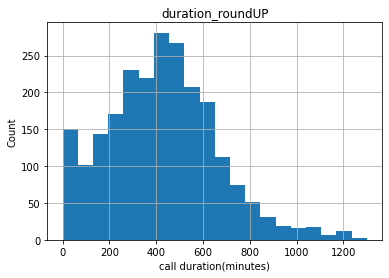

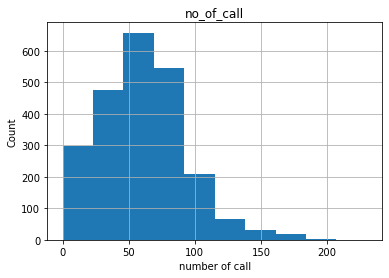

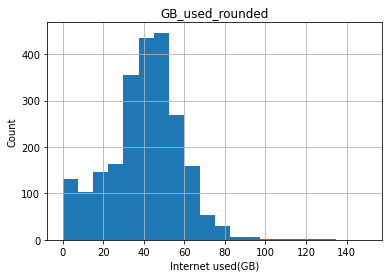

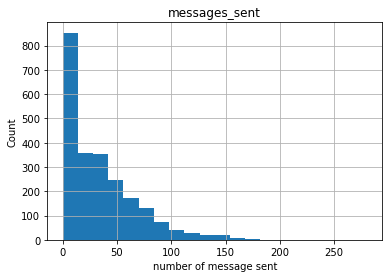

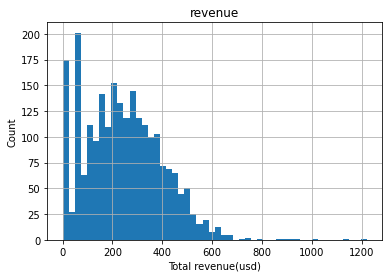

In [7]:
#how outliers affect the form and readability of the histograms
df_merged_2.hist('duration_roundUP' , bins = 20, range = (0,1300))
plt.title('duration_roundUP')
plt.xlabel('call duration(minutes)')
plt.ylabel('Count')
df_merged_2.hist('no_of_call' , bins =10, range = (0,230))
plt.title('no_of_call')
plt.xlabel('number of call')
plt.ylabel('Count')
df_merged_2.hist('GB_used_rounded' , bins = 20, range = (0,150))
plt.title('GB_used_rounded')
plt.xlabel('Internet used(GB)')
plt.ylabel('Count')
df_merged_2.hist('messages_sent' , bins = 20, range = (0,280))
plt.title('messages_sent')
plt.xlabel('number of message sent')
plt.ylabel('Count')
df_merged_2.hist('revenue' , bins = 50, range = (0,1220))
plt.title('revenue')
plt.xlabel('Total revenue(usd)')
plt.ylabel('Count')


#Descriptive statistics
display(df_merged_2.describe())

#Descriptive statistics for object column
display(df_merged_2.describe(include=['O', 'category']))


<div class="alert alert-block alert-success">
<b>Reviewer's comment:</b>

Great! You already know about the plot titles

</div>

</div>

<div class="alert alert-info"> <b>Student's comment:</b>Plot title and description have been added.</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment:</b>

One more instruction - it is nice when each plot has title and description (even if you got the expected result)

</div>



<div style="border:solid black 2px; padding: 10px">
    
* all categorical and numerical column in df_merged_2 dataframe have been analysed using descriptive statistics and histograms.
* duration_roundUP : Maxiumum call duration is 1510 minutes and minimum duration is 0 minutes.On average call duration is 427 minutes of both plans.
* no_of_call : Maxiumum call is 205 and minimum duration is 0 .On average call number is 60 of both plans.
* GB_used_rounded : Maxiumum internet used is 132 GB and minimum is 0 GB.On average internet used is 40 GB on of both plans.
* messages_sent : Maxiumum message sent number  is 266 and minimum is 0 .On average message sent number is 45 on of both plans.
* revenue : Maxiumum revenue earned 1210 usd dollars and minimum is 20 usd .On average revenue earned is 245 usd on of both plans.

*According to histograms above, People used both plan on calling and internet purposes rather than sending messages.
*Though total revenue have calculated based on call,internet and message sent.So, we will check the revenue outliers in the next step.


<AxesSubplot:xlabel='revenue'>

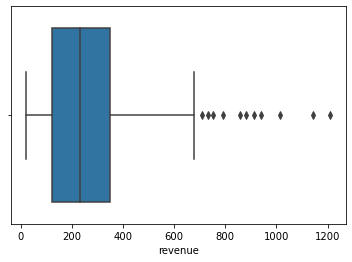

In [8]:
#checking outiers in the revenue column
sns.boxplot(x=df_merged_2['revenue'])

694.22
-223.69999999999996
df_merged_2_length: 2303
df_merged_2_filtered_length: 2292


,user_id,month,duration_roundUP,no_of_call,GB_used_rounded,messages_sent,age,revenue
count,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000
mean,1246.042321,9.125218,426.294939,59.650087,39.961606,32.933682,45.446771,241.799097
std,143.277717,2.564494,235.275963,32.271974,17.077565,33.960243,16.785791,146.725020
min,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,20.000000
25%,1122.000000,8.000000,262.000000,37.750000,31.000000,3.000000,30.000000,120.000000
50%,1245.000000,10.000000,424.000000,60.000000,42.000000,25.000000,46.000000,231.000000
75%,1368.000000,11.000000,570.000000,79.000000,51.000000,51.000000,61.000000,350.000000
max,1499.000000,12.000000,1369.000000,191.000000,96.000000,266.000000,75.000000,678.570000


service unused revenue: 400.0


,user_id,month,duration_roundUP,no_of_call,GB_used_rounded,messages_sent,plan,city,age,revenue
2293,1025,0.0,0.0,0.0,0.0,0.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",64,70.0
2294,1129,0.0,0.0,0.0,0.0,0.0,surf,"Baton Rouge, LA MSA",70,20.0
2295,1143,0.0,0.0,0.0,0.0,0.0,surf,"Cincinnati, OH-KY-IN MSA",69,20.0
2296,1269,0.0,0.0,0.0,0.0,0.0,ultimate,"Dallas-Fort Worth-Arlington, TX MSA",39,70.0
2297,1275,0.0,0.0,0.0,0.0,0.0,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA",33,70.0
2298,1307,0.0,0.0,0.0,0.0,0.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",28,20.0
2299,1319,0.0,0.0,0.0,0.0,0.0,surf,"Colorado Springs, CO MSA",21,20.0
2300,1378,0.0,0.0,0.0,0.0,0.0,surf,"Denver-Aurora-Lakewood, CO MSA",22,20.0
2301,1463,0.0,0.0,0.0,0.0,0.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",30,70.0
2302,1473,0.0,0.0,0.0,0.0,0.0,surf,"Louisville/Jefferson County, KY-IN MSA",61,20.0


New York-Newark-Jersey City, NY-NJ-PA MSA          378
Los Angeles-Long Beach-Anaheim, CA MSA             132
Chicago-Naperville-Elgin, IL-IN-WI MSA              94
Dallas-Fort Worth-Arlington, TX MSA                 86
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     81
                                                  ... 
Omaha-Council Bluffs, NE-IA MSA                      3
El Paso, TX MSA                                      2
Jacksonville, FL MSA                                 2
Raleigh-Cary, NC MSA                                 2
Cape Coral-Fort Myers, FL MSA                        1
Name: city, Length: 73, dtype: int64

surf        1568
ultimate     724
Name: plan, dtype: int64

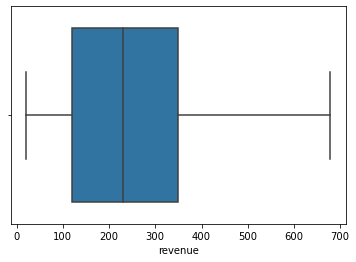

In [9]:
#Determine the upper and lower limits of outliers and remove the outliers(revenue column) using 1.5*IQR rule

uw_1 =(df_merged_2['revenue'].quantile(0.75))+(1.5*((df_merged_2['revenue'].quantile(0.75))-(df_merged_2['revenue'].quantile(0.25))))
lw_1=(df_merged_2['revenue'].quantile(0.25))-(1.5*((df_merged_2['revenue'].quantile(0.75))-(df_merged_2['revenue'].quantile(0.25))))
print(uw_1)
print(lw_1)
df_merged_2_filtered = df_merged_2.query(' @lw_1 <= revenue <= @uw_1 ')
print("df_merged_2_length:",len(df_merged_2))
print("df_merged_2_filtered_length:",len(df_merged_2_filtered))
sns.boxplot(x=df_merged_2_filtered['revenue'])
display(df_merged_2_filtered.describe())

# people didnot use megaline services at all

service_unused= df_merged_2_filtered.query('duration_roundUP <= 0 & messages_sent <= 0 & GB_used_rounded <= 0 ')
print('service unused revenue:',service_unused['revenue'].sum())
display(service_unused)
#..............................................................................

display(df_merged_2_filtered['city'].value_counts())
display(df_merged_2_filtered['plan'].value_counts())


<div style="border:solid black 2px; padding: 10px">
 
* Outiers in the revenue column have been checked using boxplot and the upper and lower limits of outliers have calculated and the outliers(revenue column) have been removed using 1.5*IQR rule and new dataframe df_merged_2_filtered have been created.
    
* duration_roundUP column:Maximum call duration is 1369 and min 0 min.On average users of both plan talks approx. 426 minutes.
* no_of_call:Maximum call no is 191 and min 0 call.On average users of both plan calls about 60 times.
* GB_used_rounded:Maximum 96 GB internet have been used and min 0GB used.On average users of both plan used 40 GB internet.
* messages_sent:Maximum 266 message have been sent and somes users never sent any message.On average users of both plan sent 34 message.
* revenue:Maximum revenue 678.57 usd dollars have obserbed and 20 usd dollars have earned.On average 241.799 usd dollars have been earned.

In [10]:
#checking revene data distributed or not using 3 sigma rule
revenue_mean=df_merged_2_filtered['revenue'].mean()
revenue_std=df_merged_2_filtered['revenue'].std()
bottom_line= revenue_mean-(3*revenue_std)
top_line= revenue_mean+(3*revenue_std)
print("Interval:", bottom_line, ",", top_line)

#average max revenue by plan and city
grouped_pivot = df_merged_2_filtered.pivot_table(index = ['city','plan'],values = ['duration_roundUP','no_of_call','GB_used_rounded','messages_sent','revenue'], aggfunc=['mean'])
grouped_pivot_sort= grouped_pivot.reindex(grouped_pivot['mean'].sort_values(by='revenue', ascending=False).index)

display(grouped_pivot_sort.head())

#monthly totalrevenue from the plans
grouped_pivot_plan = df_merged_2_filtered.pivot_table(index = ['plan'],values = ['revenue'], aggfunc=['sum'])
display(grouped_pivot_plan)




Interval: -198.37596243307917 , 681.974156150357


mean                   \
                                            GB_used_rounded duration_roundUP   
city                                   plan                                    
Albany-Schenectady-Troy, NY MSA        surf       52.400000       485.400000   
Dayton-Kettering, OH MSA               surf       50.111111       604.111111   
Fresno, CA MSA                         surf       49.800000       413.866667   
San Antonio-New Braunfels, TX MSA      surf       50.200000       282.300000   
San Jose-Sunnyvale-Santa Clara, CA MSA surf       49.650000       422.400000   

                                                                      \
                                            messages_sent no_of_call   
city                                   plan                            
Albany-Schenectady-Troy, NY MSA        surf     85.200000  69.000000   
Dayton-Kettering, OH MSA               surf      6.222222  84.555556   
Fresno, CA MSA                         surf     22.766667  57.300000   
San Antonio-New Braunfels, TX MSA      surf     35.300000  39.400000   
San Jose-Sunnyvale-Santa Clara, CA MSA surf     37.000000  61.350000   

                                                         
                                                revenue  
city                                   plan              
Albany-Schenectady-Troy, NY MSA        surf  396.220000  
Dayton-Kettering, OH MSA               surf  375.331111  
Fresno, CA MSA                         surf  373.114000  
San Antonio-New Braunfels, TX MSA      surf  372.126000  
San Jose-Sunnyvale-Santa Clara, CA MSA surf  371.738500

,sum
,revenue
plan,
surf,433950.53
ultimate,120253.00


<div class="alert alert-info"> <b>Student's comment:</b>updated and additionally total revenue calculted from both paln using grouping pivot method.</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment:</b>

As kind advice from my side - use manually printed values only in a hurry or when you don't know how to get this value from code.
`revenue_mean=242.68` = `df_merged_2_filtered['revenue'].mean()`

</div>


<div style="border:solid black 2px; padding: 10px">

* The revenue data are checked using 3 sigma rule and the interval(-196 to 681) are fit with max and min range of revenue data which is found from descriptive statistics.Megaline company gets highest avg revenue from surf plan and  from Colorado Springs, CO MSA city using is calculted by pivot method.

<div style="border:solid black 2px; padding: 10px">

## Step 4. Test the hypotheses

In [11]:
#Test the hypotheses
#The average revenue from users of Ultimate and Surf calling plan differs

surf= df_merged_2_filtered.query('plan== "surf"')
ultimate= df_merged_2_filtered.query('plan== "ultimate"')
surf_revenue=surf['revenue']
ultimate_revenue=ultimate['revenue']

display(surf.head())
display(ultimate.head())

alpha = .05   #critical statistical significance level

results = st.ttest_ind(
        surf_revenue, 
        ultimate_revenue,equal_var = False) 

print('p-value:',results.pvalue) 

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")




,user_id,month,duration_roundUP,no_of_call,GB_used_rounded,messages_sent,plan,city,age,revenue
1,1001,8.0,182.0,27.0,21.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,80.00
2,1001,9.0,315.0,49.0,41.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,280.00
3,1001,10.0,393.0,65.0,50.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,370.09
4,1001,11.0,426.0,64.0,49.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,360.00
5,1001,12.0,412.0,56.0,55.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,420.00


,user_id,month,duration_roundUP,no_of_call,GB_used_rounded,messages_sent,plan,city,age,revenue
0,1000,12.0,124.0,16.0,4.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",45,70.0
19,1006,11.0,10.0,2.0,7.0,15.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",73,70.0
20,1006,12.0,59.0,9.0,62.0,139.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",73,294.0
26,1008,10.0,476.0,71.0,48.0,21.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",53,196.0
27,1008,11.0,446.0,63.0,56.0,37.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",53,252.0


p-value: 3.9621972411945166e-95
We reject the null hypothesis


<div style="border:solid black 2px; padding: 10px">
    
* From df_merged_2_filtered dataframe two seperated dataframes surf and ultimate have been created using query method.
The analysis suggested that the average revenue from users of ultimate and surf calling plan doesnot differs.

<div class="alert alert-info"> <b>Student's comment:</b>Stat test didn't change</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment:</b>

Results of stat test may have changed when the data change - don't forget to correct conclusions

</div>


In [12]:
#Test hypotheses two
#The average revenue from users in NY-NJ area is different from that of the users from other regions

Ny_NJ_Area = df_merged_2_filtered.query('city== "New York-Newark-Jersey City, NY-NJ-PA MSA"')
Ny_NJ_Area_surf = Ny_NJ_Area.query('plan=="surf"')
Ny_NJ_Area_ultimate = Ny_NJ_Area.query('plan=="ultimate"')


others_area = df_merged_2_filtered.query('city!= "New York-Newark-Jersey City, NY-NJ-PA MSA"')
others_area_surf = others_area.query('plan=="surf"')
others_area_ultimate = others_area.query('plan=="ultimate"')

Ny_NJ_Area_surf_revenue= Ny_NJ_Area_surf['revenue']
Ny_NJ_Area_ultimate_revenue= Ny_NJ_Area_ultimate['revenue']
others_area_surf_revenue= others_area_surf['revenue']
others_area_ultimate_revenue= others_area_ultimate['revenue']


#--------------------------------------------------------------------------
alpha = .05
results = st.ttest_ind(
        Ny_NJ_Area_surf_revenue, 
        others_area_surf_revenue,equal_var =False)
print('p-value:',results.pvalue) 

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    
#--------------------------------------------------------------------   
alpha = .05# your code: set a critical statistical significance level

results = st.ttest_ind(
        Ny_NJ_Area_ultimate_revenue, 
        others_area_ultimate_revenue,equal_var =False)
print('p-value:',results.pvalue) 

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    
    

p-value: 0.23887872263946533
We can't reject the null hypothesis
p-value: 0.8812836107990695
We can't reject the null hypothesis


<div class="alert alert-block alert-success">
<b>Reviewer's comment:</b>

Looks perfect!

</div>



<div style="border:solid black 2px; padding: 10px">
    
* Ny_NJ_Area_surf_revenue,Ny_NJ_Area_ultimate_revenue,others_area_surf_revenue,others_area_surf,others_area_ultimate_revenue datasets have been extracted from df_merged_2_filtered dataframe and ttest have been done.The analysis suggested that the average revenue from users in NY-NJ area is different from that of the users from other regions.

<div style="border:solid black 2px; padding: 10px">

## Overall conclusion

<div style="border:solid black 2px; padding: 10px">

## Step 1 :  Open the data file and study the general information
    
* In the beginning, all the datasets have been opened and the general information have been analyzed.New column duration_roundUP and GB_used_rounded have been added to the calls_df dataframe and internet_df dataframe using np.ceil method from duration and mb_used column respectively.mb_used and GB_used column have been deleted using column drop method.
    
## Step 2: Data preprocessing

* call_date, session_date and message_date columns have been formated and new month column is added to the calls_df, internet_df and messages_df dataframes using DatetimeIndex method and dataframes are grouped using pivot table and column names have been changed.pivot_calls,pivot_internet and pivot_messages are merged here on 'user_id' and 'month' column and combined df_merged data frame have created.df_merged have merged with pivot_users table on 'user_id' column and new combined data frame df_merged_2 have created.
    
* dataframe df_merged_2 have 2303 length where 47 row have zero duration calls.It could be missed call.But there will be less effect for calculating monthly revenue because this 47 row have either messages or internet usages, except 10 row where people didnot use megaline service at all.

* revenue have been calculated using cost function.Row accessor method have been used here and revenue column have added to the df_merged_2 dataframe.
    
## Step 3: Data analysis:
 
* Outiers in the revenue column have been checked using boxplot and the upper and lower limits of outliers have calculated and the outliers(revenue column) have been removed using 1.5*IQR rule and new dataframe df_merged_2_filtered have been created.
    
* duration_roundUP column:Maximum call duration is 1369 and min 0 min.On average users of both plan talks approx. 426 minutes.
* no_of_call:Maximum call no is 191 and min 0 call.On average users of both plan calls about 60 times.
* GB_used_rounded:Maximum 96 GB internet have been used and min 0GB used.On average users of both plan used 40 GB internet.
* messages_sent:Maximum 266 message have been sent and somes users never sent any message.On average users of both plan sent 34 message.
* revenue:Maximum revenue 678.57 usd dollars have obserbed and 20 usd dollars have earned.On average 241.799 usd dollars have been earned.
    
* The revenue data are checked using 3 sigma rule and the interval(-198 to 681) are fit with max and min range of revenue data which is found from descriptive statistics.
    
## Step 4: Test Hypotheses:
    
* From df_merged_2_filtered dataframe two seperated dataframes surf and ultimate have been created using query method.
The analysis suggested that the average revenue from users of ultimate and surf calling plan doesnot differs.
    
* Ny_NJ_Area_surf_revenue,Ny_NJ_Area_ultimate_revenue,others_area_surf_revenue,others_area_surf,others_area_ultimate_revenue datasets have been extracted from df_merged_2_filtered dataframe  and ttest have been done.The analysis suggested that the average revenue from users in NY-NJ area is different from that of the users from other regions.
    
## Suggestion to earn more revenue:

* I found almost 10 users stopped taking megaline's service.From this customer, megaline atleast 400 usd earned from basic plans.Most probably, they decided not to use this telecom anymore.To retain this customer,alternative cheap price package could be offered.
    
* I also obserbed the most of the total revenue comes from surf calling plan and the user ratio is more than double from ultimate. Most of the users from New York-Newark-Jersey City, NY-NJ-PA MSA and Los Angeles-Long Beach-Anaheim, CA MSA area.But average highest revenue comes from Albany-Schenectady-Troy, NY MSA area.So this area is very important for the company's profit.
    
* The surf monthly range is about 20 dollars and ultimate is 70 dillars.People are more interessted to take cheapest price plan.If they can provide another offer in between 20-70 dollars, the total revenue could be dramatically increased.


<div class="alert alert-info"> <b>Student's comment:</b>suggestion have been added to the overall conclusion</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment:</b>

You've made a lot of wonderful and correct steps! Your code sometimes looks professional. By the way, to be an analyst we have to make data-based conclusions. Some of them - are a description of data and our findings, others - about technical problems with data, but the most important ones - insights useful for business. It is hard and interesting, I hope you are able to suggest some improvements based on explored data to earn or save a lot of money ;)

</div>
